In [1]:
pip install scikit-image


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Importing libraries from libarary 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from skimage import io,color
from skimage.util import img_as_ubyte

##### 1. Loading and displaying the original image 

In [3]:
image =io.imread("car.jpg")

In [4]:
image.shape

(388, 586, 3)

In [5]:
image

array([[[196, 194, 205],
        [196, 194, 205],
        [195, 193, 204],
        ...,
        [111, 133, 193],
        [110, 132, 192],
        [110, 132, 192]],

       [[197, 195, 206],
        [197, 195, 206],
        [196, 194, 205],
        ...,
        [110, 132, 192],
        [110, 132, 192],
        [110, 132, 192]],

       [[198, 196, 207],
        [198, 196, 207],
        [196, 194, 205],
        ...,
        [107, 131, 193],
        [107, 131, 193],
        [107, 131, 193]],

       ...,

       [[121, 129, 168],
        [122, 130, 169],
        [126, 134, 173],
        ...,
        [104, 112, 161],
        [106, 114, 163],
        [107, 115, 164]],

       [[133, 141, 180],
        [133, 141, 180],
        [130, 138, 177],
        ...,
        [ 97, 105, 154],
        [106, 114, 163],
        [107, 115, 164]],

       [[130, 138, 177],
        [126, 134, 173],
        [118, 126, 165],
        ...,
        [ 97, 105, 154],
        [106, 114, 163],
        [107, 115, 164]]

#### Converting the image to grary scale image

In [6]:
gray_image=color.rgb2gray(image)

In [7]:
gray_image.shape

(388, 586)

In [8]:
gray_image

array([[0.76556118, 0.76556118, 0.76163961, ..., 0.5202    , 0.51627843,
        0.51627843],
       [0.76948275, 0.76948275, 0.76556118, ..., 0.51627843, 0.51627843,
        0.51627843],
       [0.77340431, 0.77340431, 0.76556118, ..., 0.51125569, 0.51125569,
        0.51125569],
       ...,
       [0.51024275, 0.51416431, 0.52985059, ..., 0.44640353, 0.45424667,
        0.45816824],
       [0.55730157, 0.55730157, 0.54553686, ..., 0.41895255, 0.45424667,
        0.45816824],
       [0.54553686, 0.52985059, 0.49847804, ..., 0.41895255, 0.45424667,
        0.45816824]])

#### For viewing the gray/colour image 

Text(0.5, 1.0, 'Original Image')

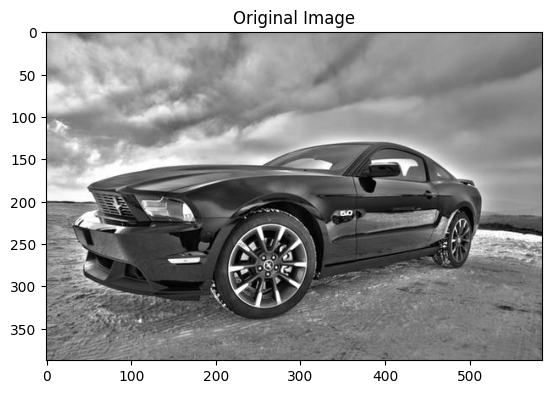

In [9]:
plt.imshow(gray_image,cmap="gray")
plt.title("Original Image")

#### Flatteing of the image

In [10]:
#### flaten_image = gray_image.reshape(gray_image.shape[0],-1)

In [11]:
#### flaten_image.shape

##### Creating the PCA object 

In [12]:
pca=PCA(n_components=0.95)

In [13]:
tranformed_image = pca.fit_transform(gray_image)

In [14]:
tranformed_image

array([[ 2.94525681e+00,  3.94820857e-01, -6.58182332e-02, ...,
        -1.59056544e-03, -1.62736882e-01,  4.65045426e-02],
       [ 2.94597883e+00,  3.97709680e-01, -8.31037769e-02, ...,
         4.69041442e-03, -1.64267394e-01,  4.92986338e-02],
       [ 2.95130978e+00,  3.97619897e-01, -1.16268761e-01, ...,
         1.16562569e-02, -1.59843228e-01,  5.82061380e-02],
       ...,
       [ 8.79452205e-02,  7.17551065e-01,  5.12001526e-01, ...,
        -1.23588508e-01, -2.02305048e-01,  5.83326820e-02],
       [ 8.00014050e-02,  6.57097409e-01,  5.48735502e-01, ...,
        -5.48801361e-02, -9.59678874e-03, -2.36659854e-02],
       [ 6.54682897e-02,  7.86207749e-01,  5.45093719e-01, ...,
         7.84974238e-02,  3.39161658e-02,  2.58672184e-02]])

##### Converting the transformed data to image 

In [15]:
reconstructed_image=pca.inverse_transform(tranformed_image)

In [16]:
reconstructed_image

array([[0.7284416 , 0.73028437, 0.72540086, ..., 0.49178333, 0.48118872,
        0.48108664],
       [0.73624021, 0.73773696, 0.7323698 , ..., 0.48841438, 0.4773785 ,
        0.47719955],
       [0.74577296, 0.74695011, 0.74082061, ..., 0.4824017 , 0.47026429,
        0.4698159 ],
       ...,
       [0.48698733, 0.48515138, 0.48232357, ..., 0.43306458, 0.44174101,
        0.44695749],
       [0.48333334, 0.48396905, 0.48157892, ..., 0.45056318, 0.45615351,
        0.46234114],
       [0.48806536, 0.4882969 , 0.48282092, ..., 0.46015943, 0.45891959,
        0.46434355]])

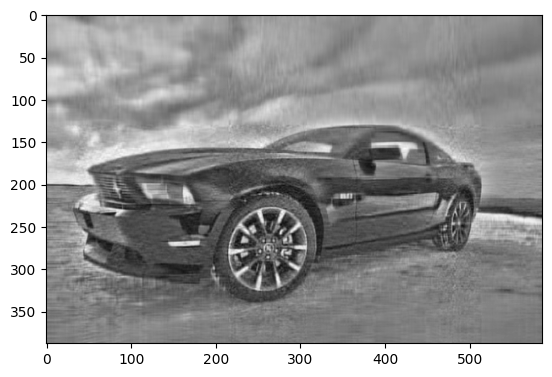

In [17]:
plt.imshow(reconstructed_image, cmap='gray')

##### Normalized the data brfore saving(due to negative values in the reconstructed image)

In [18]:
compressed_image_normalize=((reconstructed_image-reconstructed_image.min())/
                            (reconstructed_image.max()-reconstructed_image.min()))

In [19]:
convert_image_byte = img_as_ubyte(compressed_image_normalize)

##### Saving the reconstructed image

In [20]:
io.imsave("new_image.jpeg",convert_image_byte)